In [ ]:
# install the libraries for crwaling
!pip install requests   # HTTP 요청을 보내는 라이브러리
!pip install beautifulsoup4 # HTML을 파싱하는 라이브러리
!pip install selenium   # 동적 크롤링을 위한 라이브러리
!pip install webdriver_manager  # 크롬 드라이버를 설치하는 라이브러리
!pip install pandas  # 데이터를 다루는 라이브러리

In [1]:
# import the libraries
import time
import re
import random as rd
import pandas as pd
import numpy as np
import collections
from tqdm import tqdm

import requests
from bs4 import BeautifulSoup as bs
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager

from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.chrome.options import Options

In [2]:
user_agent = "Mozilla/5.0 (Linux; Android 9; SM-G975F) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/71.0.3578.83 Mobile Safari/537.36"
headers = {
    "User-Agent": user_agent
}

## BS4를 활용한 기사제목 수집

URL: https://search.naver.com/search.naver?where=news&query=오염수&sm=tab_opt&sort=0&photo=0&field=0&pd=3&ds=20221111&de=20231111&docid=&related=0&mynews=0&office_type=0&office_section_code=0&news_office_checked=&nso=so%3Ar%2Cp%3Afrom20221111to20231111&is_sug_officeid=0&office_category=0&service_area=0
status code: 200
<!DOCTYPE html>
 <html lang="ko"><head> <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/> <meta content="text/javascript" http-equiv="Content-Script-Type"/> <meta content="always" name="referrer"/> <meta content="width=device-width, initial-scale=1.0, maximum-scale=2.0, minimum-scale=1.0, user-scalable=yes" name="viewport"/> <meta content="telephone=no,address=no,email=no" name="format-detection"/> <meta content="오염수 : 네이버 뉴스검색" property="og:title"> <meta content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png" property="og:image"/> <meta content="'오염수'의 네이버 뉴스검색 결과입니다." property="og:description"/> <meta content="'오염수'의 네이버 뉴스검색 결과입니다." lang="ko"
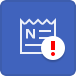

In [3]:
# 키워드를 입력하여 URL 생성
query = input("검색어를 입력하세요: ")
start_date = re.sub(r'[^0-9]', '', input("시작 날짜를 yyyy.mm.dd 형식으로 입력하세요: ")) # 시작 날짜(정규식을 이용하여 숫자만 추출)
end_date = re.sub(r'[^0-9]', '', input("종료 날짜를 yyyy.mm.dd 형식으로 입력하세요: "))    # 종료 날짜(정규식을 이용하여 숫자만 추출)

num_articles_per_page = 10  # 페이지당 기사 수
num_pages = int(input("크롤링할 페이지 수를 입력하세요: "))  # 크롤링할 페이지 수

# 데이터를 저장할 리스트 초기화
data = []

# URL 생성
url = f'https://search.naver.com/search.naver?where=news&query={query}&sm=tab_opt&sort=0&photo=0&field=0&pd=3&ds={start_date}&de={end_date}&docid=&related=0&mynews=0&office_type=0&office_section_code=0&news_office_checked=&nso=so%3Ar%2Cp%3Afrom{start_date}to{end_date}&is_sug_officeid=0&office_category=0&service_area=0'
print(f'URL: {url}')
url = f'https://search.naver.com/search.naver?where=news&sm=tab_jum&query={query}&start={start_index}&pd=3&ds={start_date}&de={end_date}'


# HTML 문서 가져오기
response = requests.get(url, headers=headers);  print(f'status code: {response.status_code}')
html = response.text

# BeautifulSoup을 이용하여 HTML 파싱
soup = bs(html, 'html.parser'); 
print(soup)

# 기사 제목 추출
titles = soup.select('a.news_tit')

# 추출한 데이터를 리스트에 저장
for title in titles:
    data.append(title.get_text())
print(data)    

# 데이터프레임 생성
df = pd.DataFrame(data, columns=["뉴스 제목"])

# CSV 파일로 저장
csv_filename = input("파일명을 입력하세요: ")
df.to_csv(f'{csv_filename}.csv', index=False)

## 수집된 데이터의 전처리 및 워드클라우드 맛보기